**IMPORT DATASET**

In [ ]:
from google.colab import files
upload=files.upload()

Saving champiagn.csv to champiagn.csv


**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('champiagn.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


**RENAMING COLUMN**

In [ ]:
df=df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'monthly_sales'})
df.head()

,Month,monthly_sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()

,Month,monthly_sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


**DROPPING SOME VALUES**

In [ ]:
df.drop(106,axis=0,inplace=True)

In [ ]:
df.drop(105,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,monthly_sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
df.size

210

**CONVERTING MONTH COLUMN TO DATETIME**

In [ ]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.head()

,monthly_sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.tail()

,monthly_sales,rollmean,rollstd,Seasonal First Difference,forecast
Month,,,,,
1972-05-01,4618.0,5709.500000,2943.699327,-392.0,4717.510672
1972-06-01,5312.0,5746.000000,2935.100773,438.0,4906.403885
1972-07-01,4298.0,5718.083333,2948.213094,-335.0,4685.436279
1972-08-01,1413.0,5697.583333,2979.690449,-246.0,2232.408415
1972-09-01,5877.0,5691.416667,2979.194841,-74.0,NaN


<Axes: xlabel='Month', ylabel='monthly_sales'>

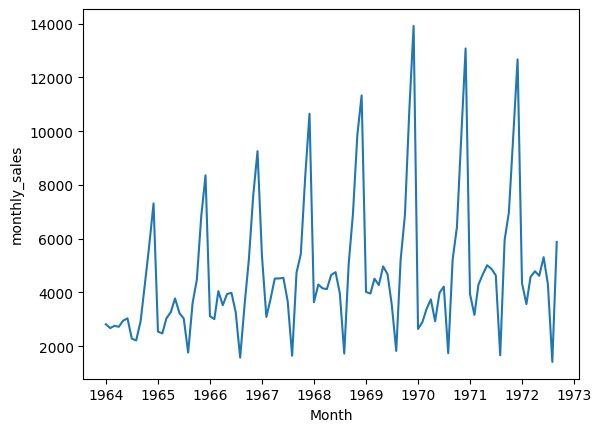

In [ ]:
sns.lineplot(data=df,x=df.index,y='monthly_sales')

**DECOMPOSING INTO TREND, SEASONALITY, RESIDUAL**

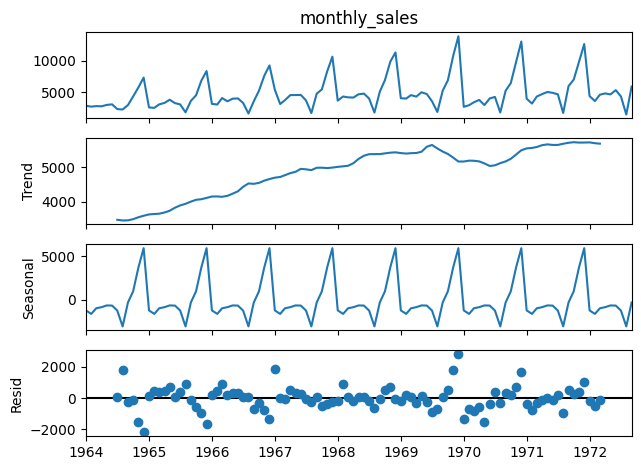

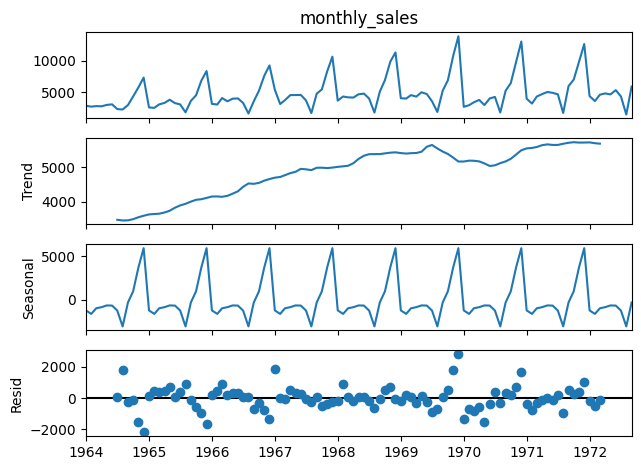

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
dc= seasonal_decompose(df['monthly_sales'])
dc.plot()

**FINDING ROLLING MEAN AND ROLLING STD**

In [ ]:
df['rollmean']=df.monthly_sales.rolling(window=12).mean()
df['rollstd']=df.monthly_sales.rolling(window=12).std()
df.head()

,monthly_sales,rollmean,rollstd
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN


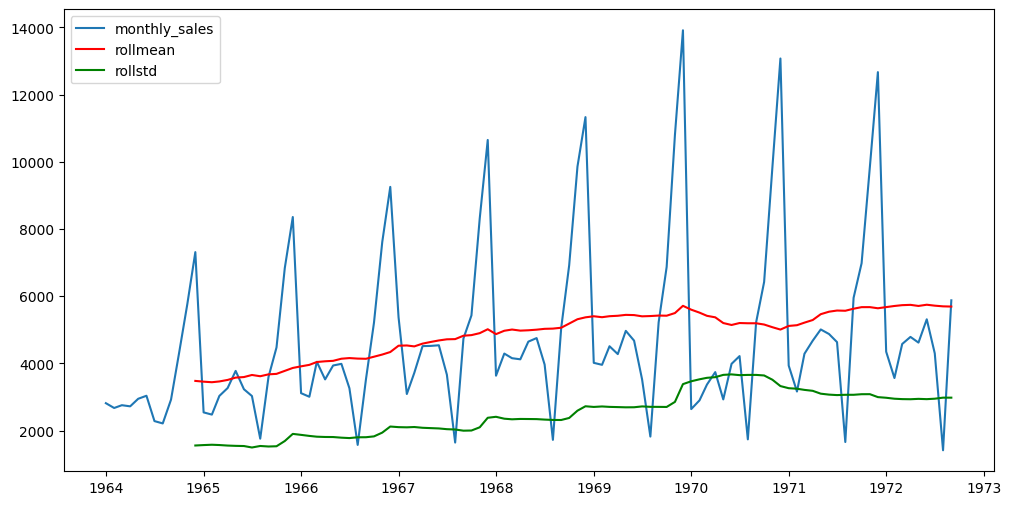

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.monthly_sales)
plt.plot(df.rollmean,color='r')
plt.plot(df.rollstd,color='g')
plt.legend(['monthly_sales','rollmean','rollstd'])

**TESTING FOR STATIONARITY**

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['monthly_sales'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(monthly_sales):
    result=adfuller(monthly_sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['monthly_sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df['Seasonal First Difference']=df['monthly_sales']-df['monthly_sales'].shift(12)

In [ ]:
df.head()

,monthly_sales,rollmean,rollstd,Seasonal First Difference
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,NaN,NaN,NaN
1964-03-01,2755.0,NaN,NaN,NaN
1964-04-01,2721.0,NaN,NaN,NaN
1964-05-01,2946.0,NaN,NaN,NaN


In [ ]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

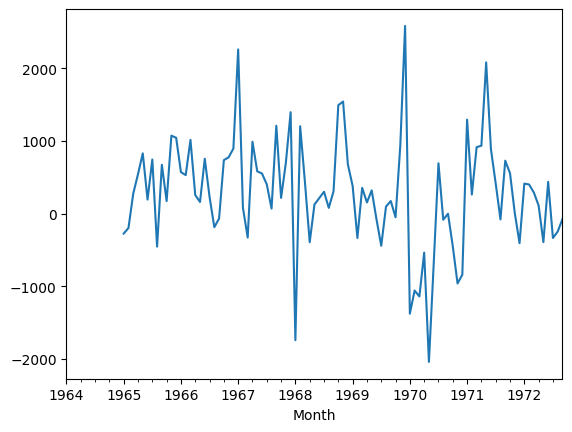

In [ ]:
df['Seasonal First Difference'].plot()

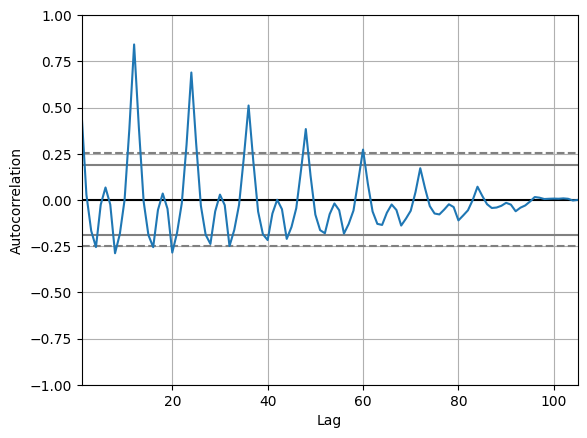

In [ ]:
from pandas.plotting import autocorrelation_plot # Importing from pandas.plotting
autocorrelation_plot(df['monthly_sales'])
plt.show()

**ACF AND PACF PLOTS**

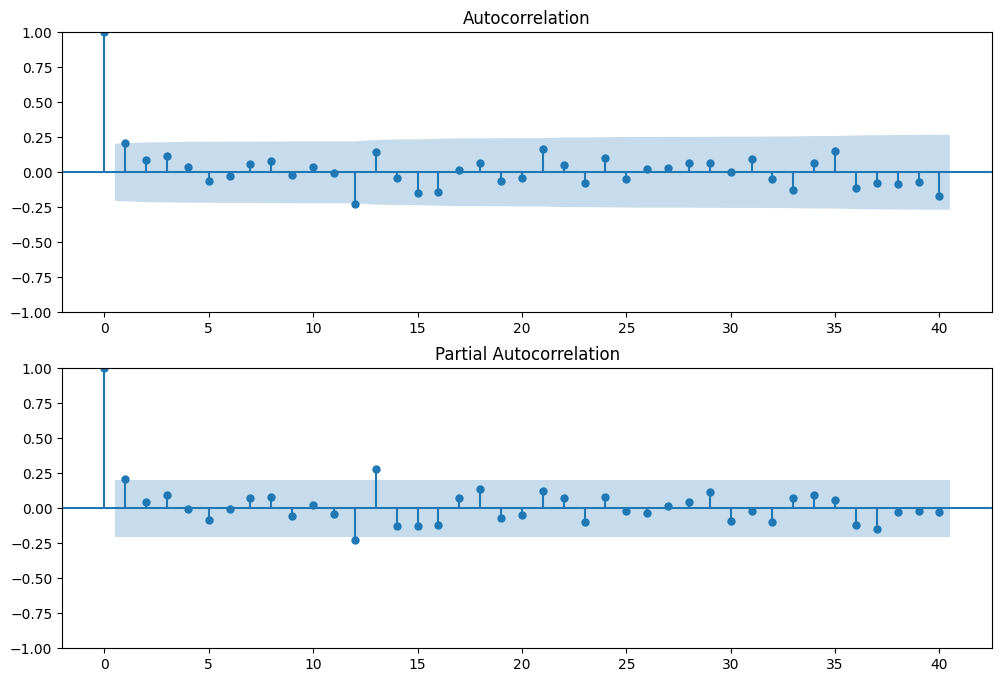

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm # Importing statsmodels.api with alias sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1) # Using the defined alias sm
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2) # Using the defined alias sm

**FITTING ARIMA MODEL**

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['monthly_sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          monthly_sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 26 Feb 2025   AIC                           1911.627
Time:                        14:47:47   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

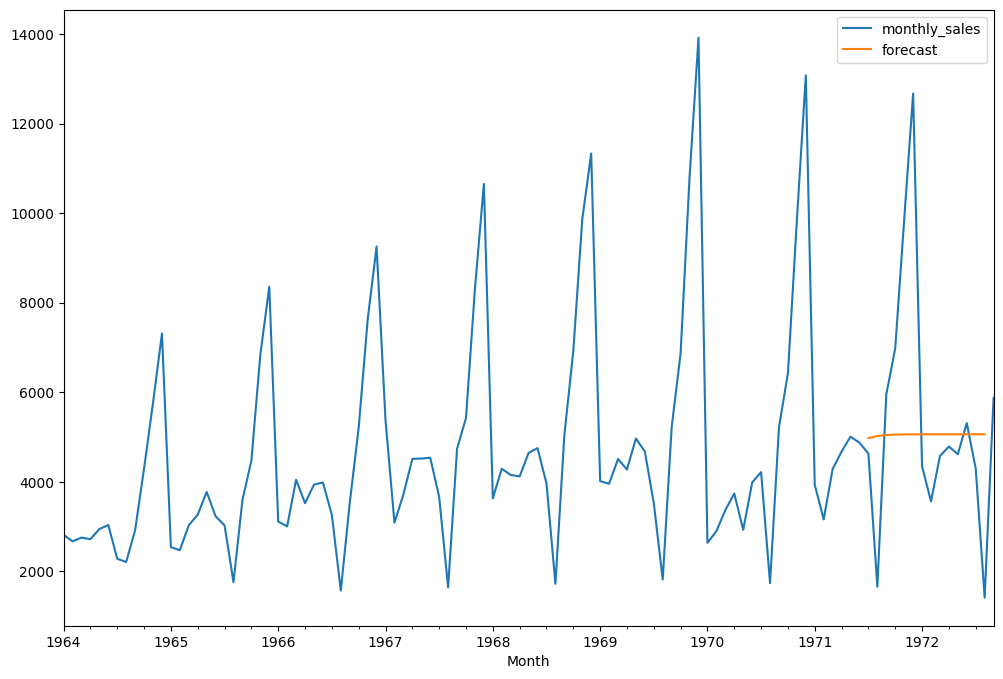

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['monthly_sales','forecast']].plot(figsize=(12,8))

**FITTING SRIMAX MODEL**

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['monthly_sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

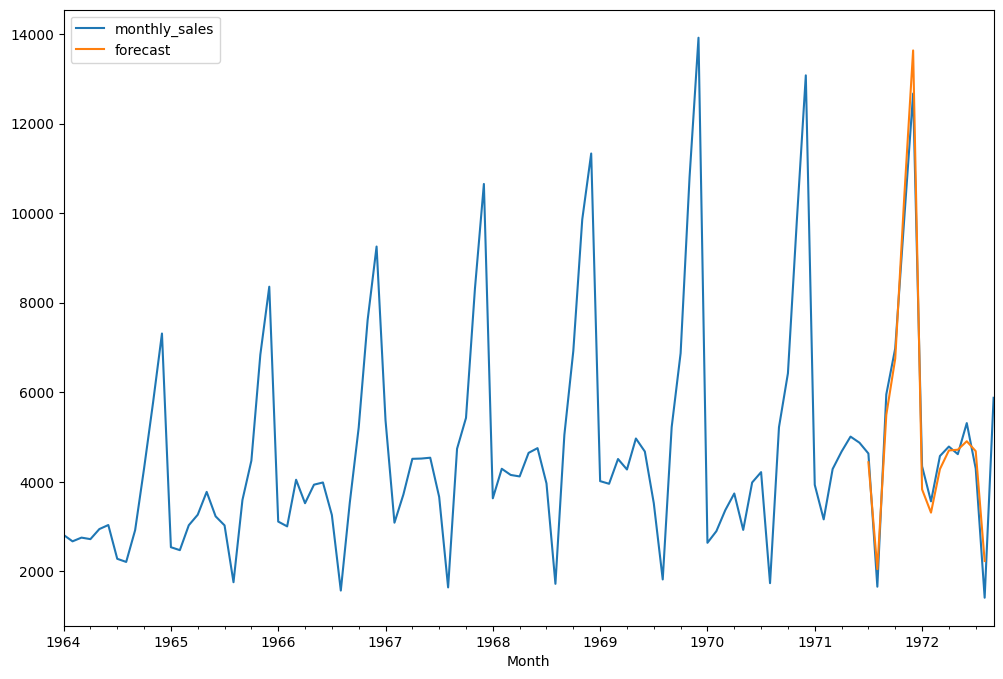

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['monthly_sales','forecast']].plot(figsize=(12,8))

**NEW DATES**

In [ ]:

futureDate = pd.DataFrame(pd.date_range(start='1972-10-01', end='1973-10-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
1972-10-01
1972-11-01
1972-12-01
1973-01-01
1973-02-01


**PREDICTING VALUES**

In [ ]:
results.predict(start=futureDate.index[0],end=futureDate.index[-1])

,predicted_mean
1972-10-01,7023.698823
1972-11-01,9996.175851
1972-12-01,12891.998305
1973-01-01,4561.379466
1973-02-01,3718.694650
1973-03-01,4792.239955
1973-04-01,5034.490021
1973-05-01,5047.836393
1973-06-01,5488.452931
1973-07-01,4593.507784


**PLOTTING PREDICTED VALUES**

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


<Axes: xlabel='Month', ylabel='monthly_sales'>

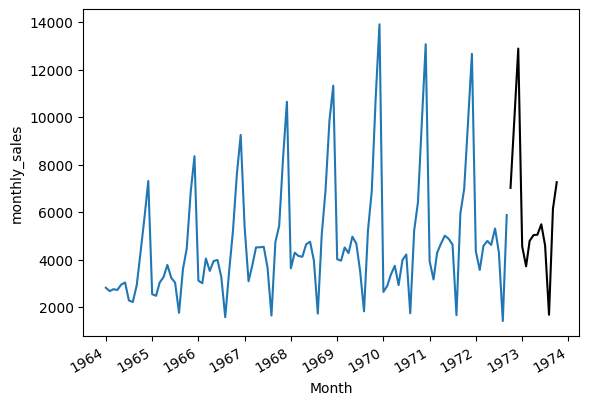

In [ ]:
sns.lineplot(data=df,x=df.index,y='monthly_sales')
results.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')